# notes

1- The dealing with datetime was done in the preprocessing step because it is useful for graphs and insights
<br>2- Some graphs was done in the data insight section because the graphs are related to the insights
<br>3- I added a small note about each code block

# install required packages and add imports

In [1]:
!pip install patool

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import patoolib
import matplotlib.pyplot as plt
import os
import pandas as pd

# read data

## uncompress the rar file

exctract the rar file if it is not already exctracted

In [5]:
input_data_dir = "sales_data"
rar_file = "Sales Data.rar"
if not os.path.exists(input_data_dir):
    os.mkdir(input_data_dir)
    patoolib.extract_archive(rar_file, outdir=input_data_dir)

## read data files and combine them

loop over files, get dataframe and add it to the resulting dataframe

In [6]:
resulting_df = None
for data_file in os.listdir(input_data_dir):
    if data_file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_data_dir, data_file))
        if resulting_df is None:
            resulting_df = df
        else:
            resulting_df = pd.concat([resulting_df, df])
resulting_df = resulting_df.sort_values(by="Order ID")


# clean and preprocess data

## display a quick insight of data

display useful information about the numerical data and print head to see how to deal with data

In [7]:
resulting_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,367857,367857,367857,367857,367857,367857
unique,186979,20,10,24,278331,228276
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,647,43399,332301,43399,647,647


In [8]:
resulting_df.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,AAA Batteries (4-pack),1,2.99,01/13/20 22:43,"438 Lakeview St, Portland, OR 97035"
0,141234,27in FHD Monitor,1,149.99,01/17/21 18:16,"111 Church St, Portland, OR 97035"
1,141235,27in FHD Monitor,1,149.99,01/13/20 12:30,"146 Jefferson St, Los Angeles, CA 90001"
1,141235,USB-C Charging Cable,1,11.95,01/24/21 20:06,"721 Highland St, New York City, NY 10001"
2,141236,USB-C Charging Cable,2,11.95,01/31/20 11:06,"711 Meadow St, New York City, NY 10001"
2,141236,Wired Headphones,1,11.99,01/04/21 19:31,"818 Maple St, New York City, NY 10001"
3,141237,Lightning Charging Cable,1,14.95,01/21/20 10:45,"779 Maple St, Seattle, WA 98101"
3,141237,Bose SoundSport Headphones,1,99.99,01/05/21 16:13,"831 5th St, Los Angeles, CA 90001"
4,141238,AA Batteries (4-pack),1,3.84,01/07/20 16:26,"823 Meadow St, San Francisco, CA 94016"
4,141238,AAA Batteries (4-pack),2,2.99,01/03/21 19:22,"289 5th St, Boston, MA 02215"


## deal with null values

check null values

In [9]:
resulting_df.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
0,False,False,False,False,False,False
1,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
...,...,...,...,...,...,...
11891,True,True,True,True,True,True
12097,True,True,True,True,True,True
12501,True,True,True,True,True,True
12654,True,True,True,True,True,True


### remove all rows where all columns are null because the information is not usefull

remove all none rows where all cells are none

In [10]:
resulting_df.dropna(thresh=6, inplace= True)

As shown the number of null cells now is zero so we stop dealing with the none values

In [11]:
resulting_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## display the columns types of data and convert them to the correct types

print the information of each column of the dataframe

In [12]:
resulting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367857 entries, 0 to 8250
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          367857 non-null  object
 1   Product           367857 non-null  object
 2   Quantity Ordered  367857 non-null  object
 3   Price Each        367857 non-null  object
 4   Order Date        367857 non-null  object
 5   Purchase Address  367857 non-null  object
dtypes: object(6)
memory usage: 19.6+ MB


as a first step convert columns to the optimum type infered by pandas

In [13]:
resulting_df = resulting_df.convert_dtypes()

In [14]:
resulting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367857 entries, 0 to 8250
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          367857 non-null  string
 1   Product           367857 non-null  string
 2   Quantity Ordered  367857 non-null  string
 3   Price Each        367857 non-null  string
 4   Order Date        367857 non-null  string
 5   Purchase Address  367857 non-null  string
dtypes: string(6)
memory usage: 19.6 MB


for the sorted dataframe by order id we find that they contain the header for the few last rows

In [15]:
resulting_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,AAA Batteries (4-pack),1,2.99,01/13/20 22:43,"438 Lakeview St, Portland, OR 97035"
0,141234,27in FHD Monitor,1,149.99,01/17/21 18:16,"111 Church St, Portland, OR 97035"
1,141235,27in FHD Monitor,1,149.99,01/13/20 12:30,"146 Jefferson St, Los Angeles, CA 90001"
1,141235,USB-C Charging Cable,1,11.95,01/24/21 20:06,"721 Highland St, New York City, NY 10001"
2,141236,USB-C Charging Cable,2,11.95,01/31/20 11:06,"711 Meadow St, New York City, NY 10001"
...,...,...,...,...,...,...
20664,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
19237,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17277,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
22821,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## remove the repeated header by check if the order ID field is correct

Filter the wrong rows by rgex where the correct Order ID contains digits

In [16]:
resulting_df = resulting_df[resulting_df["Order ID"].str.count(r'\d+') == 1]

In [17]:
resulting_df = resulting_df.reset_index(drop=True)

In [18]:
resulting_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,AAA Batteries (4-pack),1,2.99,01/13/20 22:43,"438 Lakeview St, Portland, OR 97035"
1,141234,27in FHD Monitor,1,149.99,01/17/21 18:16,"111 Church St, Portland, OR 97035"
2,141235,27in FHD Monitor,1,149.99,01/13/20 12:30,"146 Jefferson St, Los Angeles, CA 90001"
3,141235,USB-C Charging Cable,1,11.95,01/24/21 20:06,"721 Highland St, New York City, NY 10001"
4,141236,USB-C Charging Cable,2,11.95,01/31/20 11:06,"711 Meadow St, New York City, NY 10001"
...,...,...,...,...,...,...
367205,328207,Bose SoundSport Headphones,1,99.99,12/29/20 02:34,"566 5th St, Austin, TX 73301"
367206,328208,20in Monitor,1,109.99,12/27/20 15:51,"673 2nd St, Dallas, TX 75001"
367207,328209,USB-C Charging Cable,1,11.95,12/22/20 11:59,"692 Maple St, Atlanta, GA 30301"
367208,328210,USB-C Charging Cable,1,11.95,12/08/20 13:40,"866 11th St, Atlanta, GA 30301"


## deal with datetime 

as concluded from data, the datetime format is month/day/year Hours:Minutes so the column is converted from string to datetime based on that format

In [19]:
resulting_df["Order Date"] = pd.to_datetime(resulting_df["Order Date"], format="%m/%d/%y %H:%M")

In [20]:
resulting_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,AAA Batteries (4-pack),1,2.99,2020-01-13 22:43:00,"438 Lakeview St, Portland, OR 97035"
1,141234,27in FHD Monitor,1,149.99,2021-01-17 18:16:00,"111 Church St, Portland, OR 97035"
2,141235,27in FHD Monitor,1,149.99,2020-01-13 12:30:00,"146 Jefferson St, Los Angeles, CA 90001"
3,141235,USB-C Charging Cable,1,11.95,2021-01-24 20:06:00,"721 Highland St, New York City, NY 10001"
4,141236,USB-C Charging Cable,2,11.95,2020-01-31 11:06:00,"711 Meadow St, New York City, NY 10001"
...,...,...,...,...,...,...
367205,328207,Bose SoundSport Headphones,1,99.99,2020-12-29 02:34:00,"566 5th St, Austin, TX 73301"
367206,328208,20in Monitor,1,109.99,2020-12-27 15:51:00,"673 2nd St, Dallas, TX 75001"
367207,328209,USB-C Charging Cable,1,11.95,2020-12-22 11:59:00,"692 Maple St, Atlanta, GA 30301"
367208,328210,USB-C Charging Cable,1,11.95,2020-12-08 13:40:00,"866 11th St, Atlanta, GA 30301"


## add year before the order ID because there is an overlap between 2020 and 2021

As cuncluded from the first few rows the Order ID is repeated in different years.

In [21]:
resulting_df["Order ID"] = resulting_df["Order Date"].dt.year.astype(str) +  + resulting_df["Order ID"]

## convert numeric columns to the correct type

we convert quantity orders, and order id to integer. and convert price to float because it has decimals.

In [22]:
resulting_df["Quantity Ordered"] = resulting_df["Quantity Ordered"].astype(int)
resulting_df["Price Each"] = resulting_df["Price Each"].astype(float)
resulting_df["Order ID"] = resulting_df["Order ID"].astype(int)

In [23]:
resulting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367210 entries, 0 to 367209
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          367210 non-null  int64         
 1   Product           367210 non-null  string        
 2   Quantity Ordered  367210 non-null  int64         
 3   Price Each        367210 non-null  float64       
 4   Order Date        367210 non-null  datetime64[ns]
 5   Purchase Address  367210 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(2)
memory usage: 16.8 MB


## add year and month fields 

we add year, month, and day because we will need them in the insights, and graphs so it is better to get them before and sotre them than get them everytime we need them.

In [24]:
resulting_df["Order Year"] = resulting_df["Order Date"].dt.year 
resulting_df["Order Month"] = resulting_df["Order Date"].dt.to_period('M')
resulting_df["day"] =  resulting_df["Order Date"].dt.to_period('D')

In [25]:
resulting_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Year,Order Month,day
0,2020141234,AAA Batteries (4-pack),1,2.99,2020-01-13 22:43:00,"438 Lakeview St, Portland, OR 97035",2020,2020-01,2020-01-13
1,2021141234,27in FHD Monitor,1,149.99,2021-01-17 18:16:00,"111 Church St, Portland, OR 97035",2021,2021-01,2021-01-17
2,2020141235,27in FHD Monitor,1,149.99,2020-01-13 12:30:00,"146 Jefferson St, Los Angeles, CA 90001",2020,2020-01,2020-01-13
3,2021141235,USB-C Charging Cable,1,11.95,2021-01-24 20:06:00,"721 Highland St, New York City, NY 10001",2021,2021-01,2021-01-24
4,2020141236,USB-C Charging Cable,2,11.95,2020-01-31 11:06:00,"711 Meadow St, New York City, NY 10001",2020,2020-01,2020-01-31


## add total price

total price of the row is very important information because it let us conclude the total sales values.

In [26]:
resulting_df["Order Total Price"] = resulting_df["Quantity Ordered"] * resulting_df["Price Each"]

In [27]:
resulting_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Year,Order Month,day,Order Total Price
0,2020141234,AAA Batteries (4-pack),1,2.99,2020-01-13 22:43:00,"438 Lakeview St, Portland, OR 97035",2020,2020-01,2020-01-13,2.99
1,2021141234,27in FHD Monitor,1,149.99,2021-01-17 18:16:00,"111 Church St, Portland, OR 97035",2021,2021-01,2021-01-17,149.99
2,2020141235,27in FHD Monitor,1,149.99,2020-01-13 12:30:00,"146 Jefferson St, Los Angeles, CA 90001",2020,2020-01,2020-01-13,149.99
3,2021141235,USB-C Charging Cable,1,11.95,2021-01-24 20:06:00,"721 Highland St, New York City, NY 10001",2021,2021-01,2021-01-24,11.95
4,2020141236,USB-C Charging Cable,2,11.95,2020-01-31 11:06:00,"711 Meadow St, New York City, NY 10001",2020,2020-01,2020-01-31,23.90


# dataset describtion

We get the statistical information of the numerical rows

In [28]:
resulting_df.loc[:,("Quantity Ordered", "Order Total Price","Price Each")].describe()

,Quantity Ordered,Order Total Price,Price Each
count,367210.000000,367210.000000,367210.000000
mean,1.126443,186.570118,185.453902
std,0.446514,334.950859,334.779398
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,3400.000000,1700.000000


# useful data insights 

## Data of sales for each year

we get the number of orders, order total price, and price for each earch item per year
and we plot each column in a single bar chart

In [29]:
plot_data_1 = resulting_df.groupby("Order Year").agg({"Quantity Ordered": "sum", "Order Total Price": "sum", "Price Each": "mean"})
plot_data_1

,Quantity Ordered,Order Total Price,Price Each
Order Year,,,
2020,219558,36440367.67,185.874417
2021,194031,32062455.69,184.977640
2022,52,7589.72,187.949000


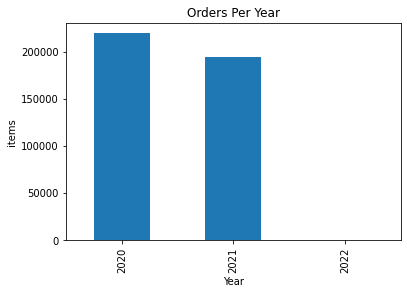

In [30]:
plot_data_1["Quantity Ordered"].plot(kind="bar", xlabel="Year", ylabel="items")
plt.title("Orders Per Year")
plt.show()

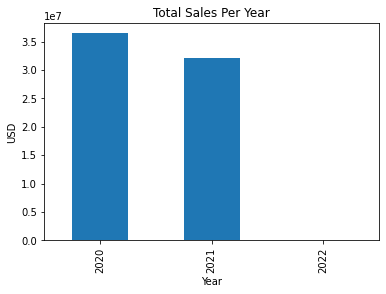

In [31]:
plot_data_1["Order Total Price"].plot(kind="bar", xlabel="Year", ylabel="USD")
plt.title("Total Sales Per Year")
plt.show()

## 2020 portion of each item

get number of orders and total value per year for each product in 2020

In [32]:
plot_data_2 = resulting_df[resulting_df["Order Year"]==2020].groupby("Product").agg({"Quantity Ordered": "sum", "Order Total Price": "sum"}).sort_values(by="Order Total Price", ascending=False)
plot_data_2

,Quantity Ordered,Order Total Price
Product,,
Macbook Pro Laptop,5073,8624100.00
iPhone,7336,5135200.00
ThinkPad Laptop,4364,4363956.36
Google Phone,5859,3515400.00
27in 4K Gaming Monitor,6292,2453817.08
Apple Airpods Headphones,16347,2452050.00
34in Ultrawide Monitor,6449,2450555.51
Flatscreen TV,5113,1533900.00
Bose SoundSport Headphones,14021,1401959.79


display percentage for only over 1% because the chart gets messy otherwise

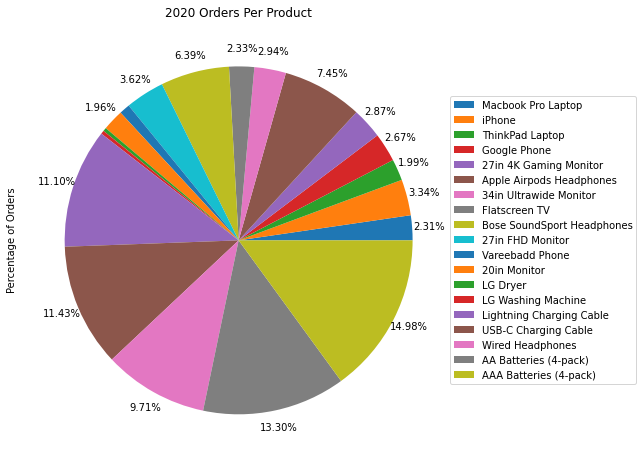

In [33]:
def my_autopct(pct):
    return "{:.2f}%".format(pct) if pct >= 1 else ''
plot_data_2["Quantity Ordered"].plot(kind="pie", subplots=True, figsize=(8,8), labels=None, autopct=my_autopct, startangle=0,  pctdistance=1.1, ylabel="Percentage of Orders")
plt.legend(labels= plot_data_2.index,loc='center', bbox_to_anchor=(1.2,0.5))
plt.title("2020 Orders Per Product")
plt.show()

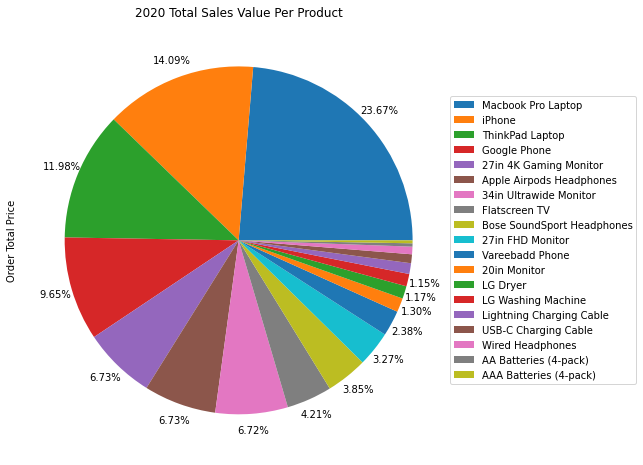

In [34]:
plot_data_2["Order Total Price"].plot(kind="pie", subplots=True, figsize=(8,8), labels=None, autopct=my_autopct, startangle=0,  pctdistance=1.1)
plt.legend(labels= plot_data_2.index,loc='center', bbox_to_anchor=(1.2,0.5))
plt.title("2020 Total Sales Value Per Product")
plt.show()

## 2021 portion of each item

get number of orders and total value per year for each product in 2020

In [35]:
plot_data_3 = resulting_df[resulting_df["Order Year"]==2021].groupby("Product").agg({"Quantity Ordered": "sum", "Order Total Price": "sum"}).sort_values(by="Order Total Price", ascending=False)
plot_data_3

,Quantity Ordered,Order Total Price
Product,,
Macbook Pro Laptop,4453,7570100.00
iPhone,6425,4497500.00
ThinkPad Laptop,3796,3795962.04
Google Phone,5056,3033600.00
27in 4K Gaming Monitor,5760,2246342.40
34in Ultrawide Monitor,5737,2180002.63
Apple Airpods Headphones,14420,2163000.00
Flatscreen TV,4399,1319700.00
Bose SoundSport Headphones,12504,1250274.96


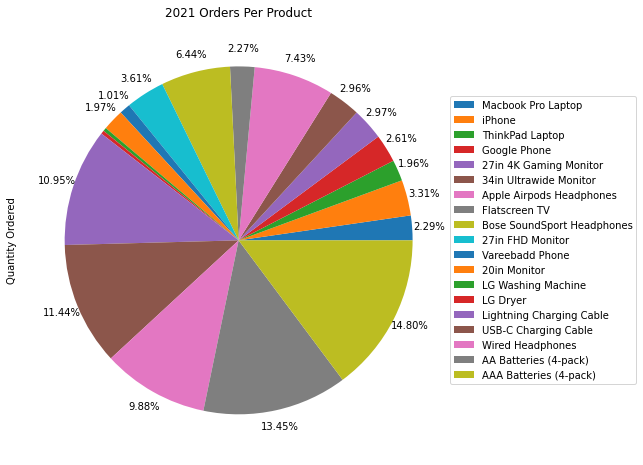

In [36]:
plot_data_3["Quantity Ordered"].plot(kind="pie", subplots=True, figsize=(8,8), labels=None, autopct=my_autopct, startangle=0,  pctdistance=1.1)
plt.legend(labels= plot_data_3.index,loc='center', bbox_to_anchor=(1.2,0.5))
plt.title("2021 Orders Per Product")
plt.show()

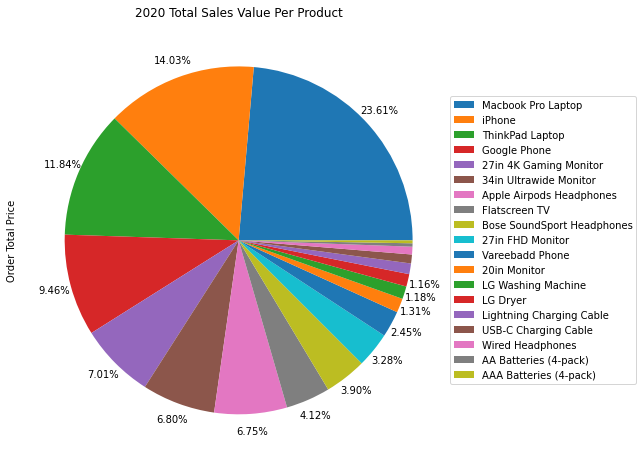

In [37]:
plot_data_3["Order Total Price"].plot(kind="pie", subplots=True, figsize=(8,8), labels=None, autopct=my_autopct, startangle=0,  pctdistance=1.1)
plt.legend(labels= plot_data_3.index,loc='center', bbox_to_anchor=(1.2,0.5))
plt.title("2020 Total Sales Value Per Product")
plt.show()

## best selling item by month

At first we aggregate sales based on Month and product. The we find the max product per month. after that we join the left and right to get order name and value

In [38]:
left_1 = resulting_df.groupby(['Order Month',"Product"]).agg({"Order Total Price": "sum"}).reset_index()

right_1 = left_1.groupby(['Order Month']).agg({"Order Total Price": "max"}).reset_index()
result_1 = pd.merge(left_1, right_1, on='Order Total Price') \
.iloc[:,0:3].rename(columns={"Order Month_x": "Month", "Order Total Price": "Sales Per Month"})


result_1 = result_1.sort_values(by="Month").reset_index(drop=True)
result_1

,Month,Product,Sales Per Month
0,2020-01,Macbook Pro Laptop,799000.0
1,2020-02,Macbook Pro Laptop,341700.0
2,2020-03,Macbook Pro Laptop,285600.0
3,2020-04,Macbook Pro Laptop,586500.0
4,2020-05,Google Phone,285600.0
5,2020-05,Macbook Pro Laptop,652800.0
6,2020-06,Macbook Pro Laptop,598400.0
7,2020-07,Macbook Pro Laptop,690200.0
8,2020-08,Macbook Pro Laptop,355300.0
9,2020-09,Macbook Pro Laptop,1016600.0


In [39]:
left_2 = resulting_df.groupby(['Order Month',"Product"]).agg({"Quantity Ordered": "sum"}).reset_index()

right_2 = left_2.groupby(['Order Month']).agg({"Quantity Ordered": "max"}).reset_index()

result_2 = pd.merge(left_2, right_2, on='Quantity Ordered') \
.iloc[:,0:3].rename(columns={"Order Month_x": "Month", "Quantity Ordered": "Number of Sales Per Month"})

result_2 = result_2.sort_values(by="Month").reset_index(drop=True)
result_2

,Month,Product,Number of Sales Per Month
0,2020-01,AAA Batteries (4-pack),2973
1,2020-02,AAA Batteries (4-pack),1222
2,2020-03,AAA Batteries (4-pack),1053
3,2020-04,AAA Batteries (4-pack),2241
4,2020-05,AAA Batteries (4-pack),2550
5,2020-06,AAA Batteries (4-pack),2468
6,2020-07,AAA Batteries (4-pack),2560
7,2020-08,AAA Batteries (4-pack),1097
8,2020-09,AAA Batteries (4-pack),3962
9,2020-10,AAA Batteries (4-pack),4066


## top 10 orders 

We sum the total price of each row with the same ID and then we join with the original table to get on Order ID to get useful information. We remove dublicates because the same order ID has the same information.

In [40]:
top_10 = resulting_df.groupby(['Order ID']).agg({"Order Total Price": "sum"}).reset_index(). \
sort_values(by="Order Total Price" , ascending=False).head(10)
pd.merge(top_10, resulting_df, on='Order ID')[["Order ID", "Order Total Price_x",  \
                                               "Order Date", "Purchase Address"]]. \
                                                rename(columns= {"Order Total Price_x": "Order Total Price" })\
                                                .drop_duplicates().reset_index(drop=True)

,Order ID,Order Total Price,Order Date,Purchase Address
0,2020183976,3400.00,2020-04-19 16:33:00,"998 Spruce St, Boston, MA 02215"
1,2021257023,3400.00,2021-10-11 08:04:00,"788 8th St, New York City, NY 10001"
2,2021260077,3400.00,2021-10-03 20:52:00,"120 Center St, New York City, NY 10001"
3,2021143193,3400.00,2021-01-30 14:34:00,"996 Center St, Atlanta, GA 30301"
4,2021168066,3400.00,2021-03-23 22:28:00,"65 14th St, Los Angeles, CA 90001"
5,2020266008,3400.00,2020-10-10 00:36:00,"842 Walnut St, Austin, TX 73301"
6,2020291192,3400.00,2020-11-21 16:31:00,"365 9th St, New York City, NY 10001"
7,2020320514,3400.00,2020-12-09 21:22:00,"865 Sunset St, Boston, MA 02215"
8,2021220941,2699.99,2021-08-22 07:55:00,"475 10th St, Atlanta, GA 30301"
9,2020196128,2699.99,2020-05-05 22:44:00,"212 Church St, Los Angeles, CA 90001"


# more useful charts

## orders trends per day

we aggregate the sum of order total price and number of orders per day to get the sales trend

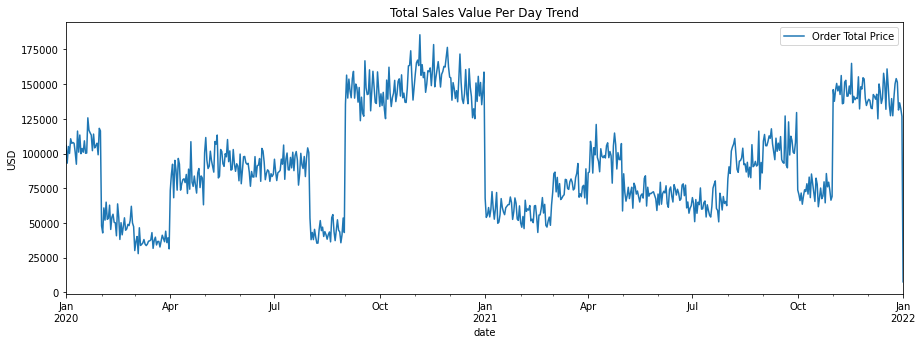

In [41]:
resulting_df.groupby('day').agg({"Order Total Price": "sum"}).plot(figsize=(15,5), xlabel= "date", ylabel="USD")
plt.title("Total Sales Value Per Day Trend")
plt.show()

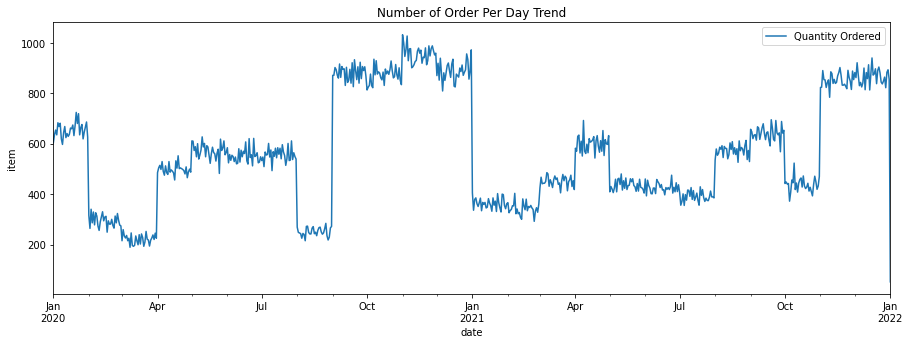

In [42]:
resulting_df.groupby('day').agg({"Quantity Ordered": "sum"}).plot(figsize=(15,5), xlabel= "date", ylabel="item")
plt.title("Number of Order Per Day Trend")
plt.show()

# machine learning ideas suggestion.

1- We can get the information of everyday wheather the day is holiday, and we can easily get the day of week, in addition to the information we already have for historical number of sales, and total USD sales per day. Based on that information we can forcast the sales per day using time series algorithms such as LSTM.
<br>2- As in the step mentioned above we can also predict the number of sales per day for each product so we can keep extra stock in stores based on the number of predicted sold items. 
<br>3- We can also apply clustering algorithms to cluster the products based on sales trend, and price. We can also do the same for order IDs. In that way we can get another dimension to deal with products and get insights based on the cluster ID. K-means is a good choice for clusering 